Install necessary libraries

In [36]:
import string
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking at the data

In [8]:
pd.set_option('display.max_rows', None)  

#open dataset
dataset = pd.read_csv("covid-data.csv")
dataset.head()
dataset.shape #we have 213096 rows with 67 features
dataset.columns.tolist() #list the features

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

Number of data missing

In [21]:
#number of missing data
def missingData():
    return dataset.isnull().sum()
missingData()

iso_code                                           0
continent                                      12283
location                                           0
date                                               0
total_cases                                     8900
new_cases                                       9135
new_cases_smoothed                             10317
total_deaths                                   27694
new_deaths                                     27745
new_deaths_smoothed                            28920
total_cases_per_million                         9837
new_cases_per_million                          10072
new_cases_smoothed_per_million                 11249
total_deaths_per_million                       28618
new_deaths_per_million                         28669
new_deaths_smoothed_per_million                29839
reproduction_rate                              53447
icu_patients                                  185828
icu_patients_per_million                      

Percentage wise of data missing

In [22]:
#percentage of missing data
def missingDataPercentage():
    total_cells = np.product(dataset.shape)
    total_missing = missing_data_values.sum()   
    return round((total_missing/total_cells)*100,2)
missingDataPercentage()


44.89

In [23]:
def missingDataPercentagePerFeature():
    return round(dataset.isnull().sum()/len(dataset)*100,2)
missingDataPercentagePerFeature()

iso_code                                       0.00
continent                                      5.76
location                                       0.00
date                                           0.00
total_cases                                    4.18
new_cases                                      4.29
new_cases_smoothed                             4.84
total_deaths                                  13.00
new_deaths                                    13.02
new_deaths_smoothed                           13.57
total_cases_per_million                        4.62
new_cases_per_million                          4.73
new_cases_smoothed_per_million                 5.28
total_deaths_per_million                      13.43
new_deaths_per_million                        13.45
new_deaths_smoothed_per_million               14.00
reproduction_rate                             25.08
icu_patients                                  87.20
icu_patients_per_million                      87.20
hosp_patient

Pie plot of missing data

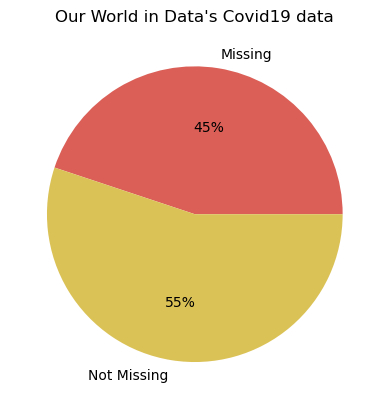

In [24]:
def piePlotMissingData():
    missing_data_values = missingData()
    total_cells = np.product(dataset.shape)
    total_missing = missing_data_values.sum()  
    labels = ['Missing','Not Missing']
    rounded_missing_percentage = round((total_missing/total_cells)*100,2)
    total_percentage = 100-rounded_missing_percentage
    data = [rounded_missing_percentage,total_percentage]
    colors = sns.color_palette("hls", 8)
    plt.pie(data,labels=labels, colors=colors,autopct='%.0f%%')
    plt.title("Our World in Data's Covid19 data")
    plt.show()
piePlotMissingData()

bar graph of missing values per feature

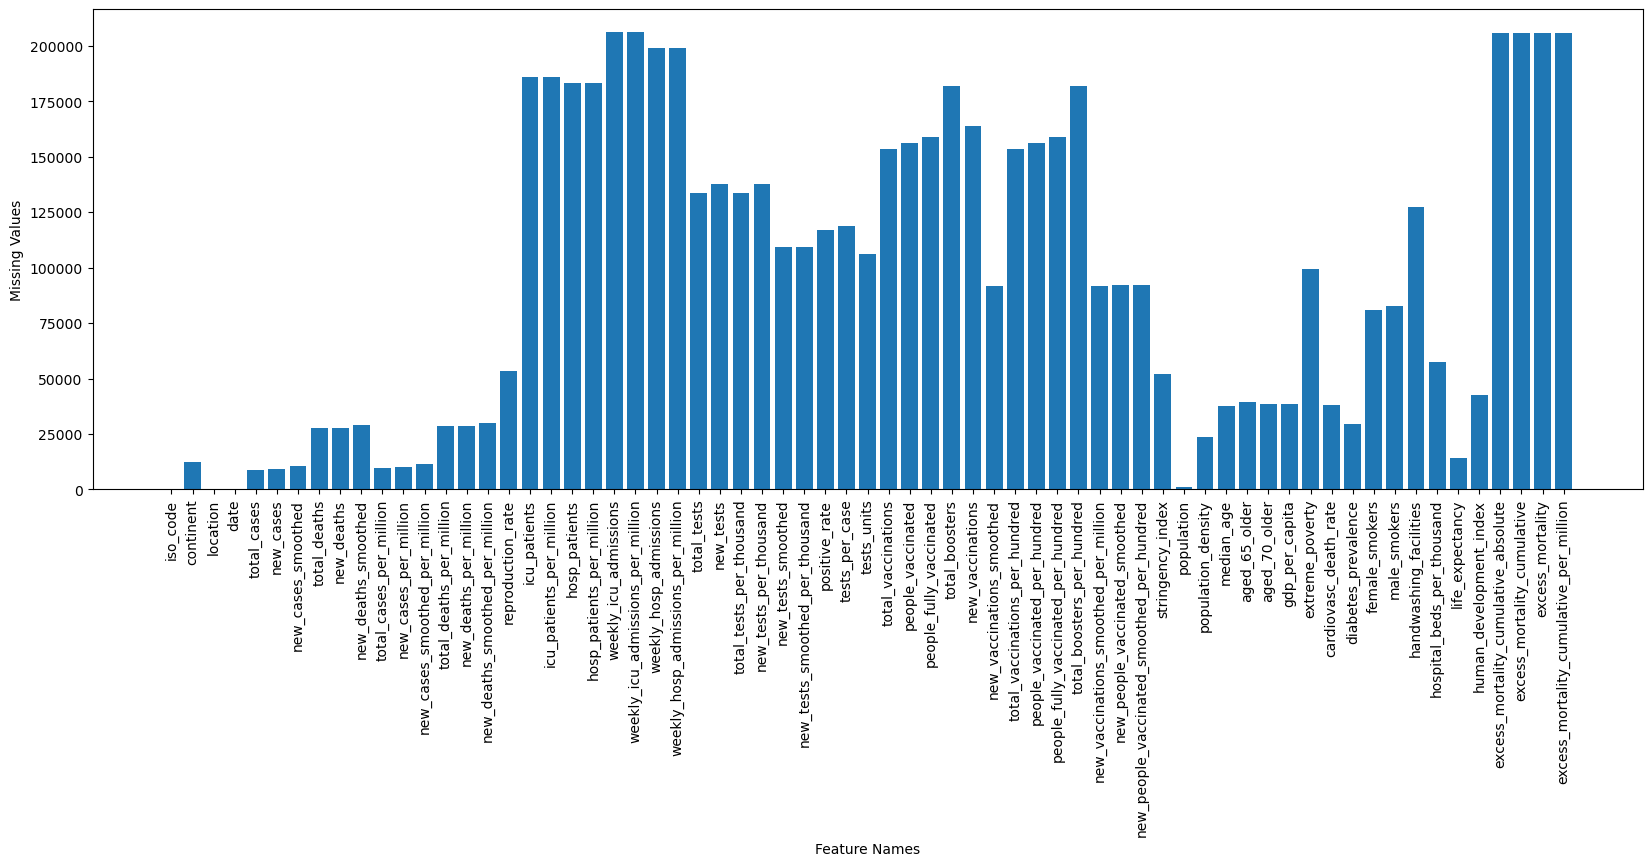

In [29]:
def graphMissingDataValues():
    missing_data_values = missingData()
    missing_values = missing_data_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['feature']
    missing_values['feature'] = missing_values.index
    plt.figure(figsize=(20,10))
    plt.gcf().subplots_adjust(bottom=0.40)
    plt.bar(missing_values['feature'],missing_values['count'])
    plt.xticks(rotation = 90)
    plt.xlabel("Feature Names")
    plt.ylabel("Missing Values")
    plt.show()
graphMissingDataValues()

iso_code will be possibly drop as it is easier to read location and it provides the same information
print(dataset['iso_code'][0:10]) #ISO gives AFG as a code for Afghanistan
print(dataset['location'].unique()) #shows all the unique values

iso_code is also dropped since location is enough for geographical location

In [30]:
dataset = dataset.drop(columns=['iso_code'])

A lot of continents that were "NaN" was because 
the location was used as the continent, so we just switched over the location to the continent data

In [32]:
dataset['continent'] = dataset['continent'].fillna(dataset['location'])

Unique countries

In [33]:
dataset['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Oceania', 'European Union', 'High income', 'International',
       'Low income', 'Lower middle income', 'Upper middle income',
       'World'], dtype=object)

In [35]:
dataset['date'] = pd.to_datetime(dataset['date'],format="%Y-%m-%d")
dataset['date'].dtype #now we have a datetime64 type and not an object type

dtype('<M8[ns]')

track features of countries

In [37]:
def TrackFeatureByCountryGraph(country: string, track_feature: string):
    gk = dataset.groupby("location")
    gk = gk.get_group(country)
    plt.figure(figsize=(20,10))
    plt.xlabel("Date")
    plt.ylabel(track_feature)
    if(country[len(country)-1] == 's'):
        plt.title(country + "' total number of Covid19 " + track_feature + " over time")
    else:
        plt.title(country + "'s total number of Covid19 " + track_feature + " over time")
    plt.grid(True)
    plt.fill_between(gk['date'],gk[track_feature])
    plt.show()

Exampled with Vietnam and Mexico:

Vietnam - new deaths

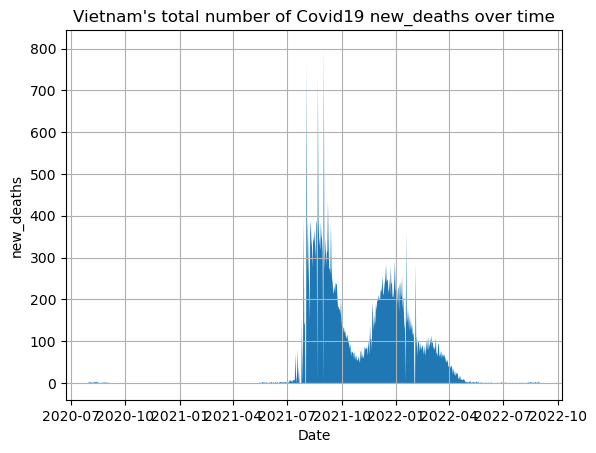

In [38]:
TrackFeatureByCountryGraph("Vietnam", "new_deaths")

Mexico - new deaths

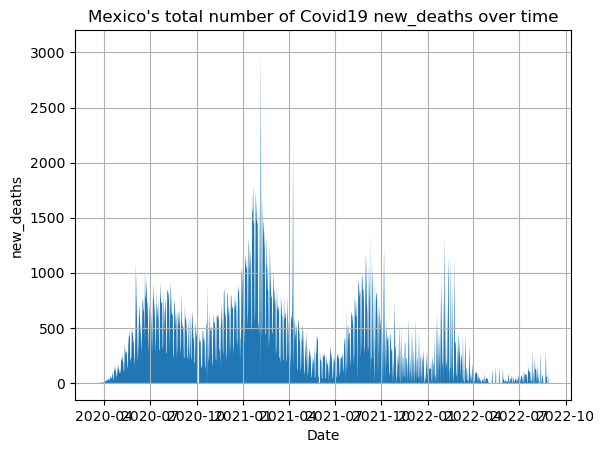

In [39]:
TrackFeatureByCountryGraph("Mexico", "new_deaths")